# 데이터 csv파일로 대체

In [2]:
import pandas as pd

ai_company_df = pd.read_csv('ai_company.csv')
ai_company_df.head()

,id,company_name,employee_count,investment_amount,round,recent_funding_year,address,ideal_talent,selected_year,category,...,company_type,overall_rating,welfare_Salary,work_life_balance,company_culture,recommendation,growth_potential,구/시,위도,경도
0,1,몰로코,150,"2,439+",Series-D,2023.0,"서울 강남구 테헤란로 231 WEST동 8,9층(센터필드)",◾(겸손) 모든 사람의 목소리는 존중하고 소중하게 여기며 경청하는 사람◾(무한한 성...,2024,광고/미디어,...,외국계 (외국 투자기업),4.3,4.1,3.7,3.9,0.92,0.92,강남구,37.503043,127.041588
1,2,플래티어,264,NaN,NaN,NaN,"서울특별시 송파구 법원로9길 26, D동 6층 (문정동, 에이치비즈니스파크)","◾(존중, 긍정적인 태도, 성장) 동료를 존중하고 매사 긍정적인 태도와 시각으로 본...",2024,광고/미디어,...,중소기업,3.1,3.3,3.3,3.1,0.54,0.29,송파구,37.481670,127.120697
2,3,한국축산데이터,65,320,Series B,2021.0,서울 강남구 테헤란로 305 한국기술센터 21층,◾(커뮤니케이션 능력) 부서 내부 및 타 부서 간 원활하게 소통하고 협업하는 능력◾...,2024,농업,...,중소기업,3.0,2.8,3.9,2.9,0.40,0.35,강남구,37.503298,127.043648
3,4,뤼이드,140,"2,840",Series-D,2021.0,서울특별시 강남구 테헤란로 521 파르나스타워 10층,"◾(혁신) 교육 시장의 전통적 패러다임을 전환하고, 본질적 문제를 해결하려는 혁신가...",2024,교육,...,중소기업,3.1,3.4,3.6,2.8,0.36,0.36,강남구,37.510057,127.061329
4,5,매스프레소,190,"1,292",Series-C,2023.0,서울특별시 강남구 선릉로 428 위워크 선릉 3호점 17층,◾(행동력) Do it now! 생각한 것을 실행하려는 행동력 있는 인재,2024,교육,...,중소기업,3.4,3.3,2.9,3.6,0.50,0.34,강남구,37.503421,127.049803


In [3]:
import re

def extract_region(address):
    # 서울 주소일 경우 구 추출
    if "서울" in address:
        gu = re.search(r'(\S+구)', address)
        if gu:
            return gu.group(1)
    # 그 외 지역은 시 추출
    else:
        city = re.search(r'(\S+광역시|\S+시)', address)
        if city:
            return city.group(1)
    return '기타'  # 매칭 안 될 경우 '기타'로 반환

# 구 또는 시 추출하여 새로운 컬럼 추가
ai_company_df['구/시'] = ai_company_df['address'].apply(extract_region)

# 구/시별로 개수 세기
region_counts = ai_company_df['구/시'].value_counts()

# 결과 출력
print(region_counts)

구/시
강남구      50
성남시      28
서초구      24
영등포구     10
마포구       7
기타        7
구로구       7
중구        7
성동구       6
안양시       5
관악구       4
금천구       4
용산구       3
송파구       2
청주시       2
남구        2
용인시       2
강서구       2
수원시       2
대전광역시     2
화성시       1
동작구       1
대전시       1
제주시       1
강동구       1
알파시       1
광진구       1
노원구       1
인천시       1
고양시       1
춘천시       1
대구시       1
Name: count, dtype: int64


In [4]:
average_rating = ai_company_df.groupby('구/시')['overall_rating'].mean().reset_index()
print(average_rating)


      구/시  overall_rating
0     강남구        3.039130
1     강동구        4.200000
2     강서구        3.150000
3     고양시        3.000000
4     관악구        3.433333
5     광진구        2.100000
6     구로구        2.814286
7     금천구        2.450000
8      기타        3.071429
9      남구        3.400000
10    노원구        2.900000
11    대구시        0.000000
12  대전광역시        3.650000
13    대전시        2.500000
14    동작구        4.800000
15    마포구        2.028571
16    서초구        3.300000
17    성남시        2.769231
18    성동구        3.100000
19    송파구        3.050000
20    수원시        2.900000
21    안양시        2.680000
22    알파시        2.300000
23   영등포구        3.150000
24    용산구        1.933333
25    용인시        2.700000
26    인천시        3.100000
27    제주시        4.000000
28     중구        2.557143
29    청주시        2.400000
30    춘천시        2.100000
31    화성시        2.600000


/tmp/ipykernel_15209/2881604320.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts_sorted.values, y=region_counts_sorted.index, palette="Spectral")


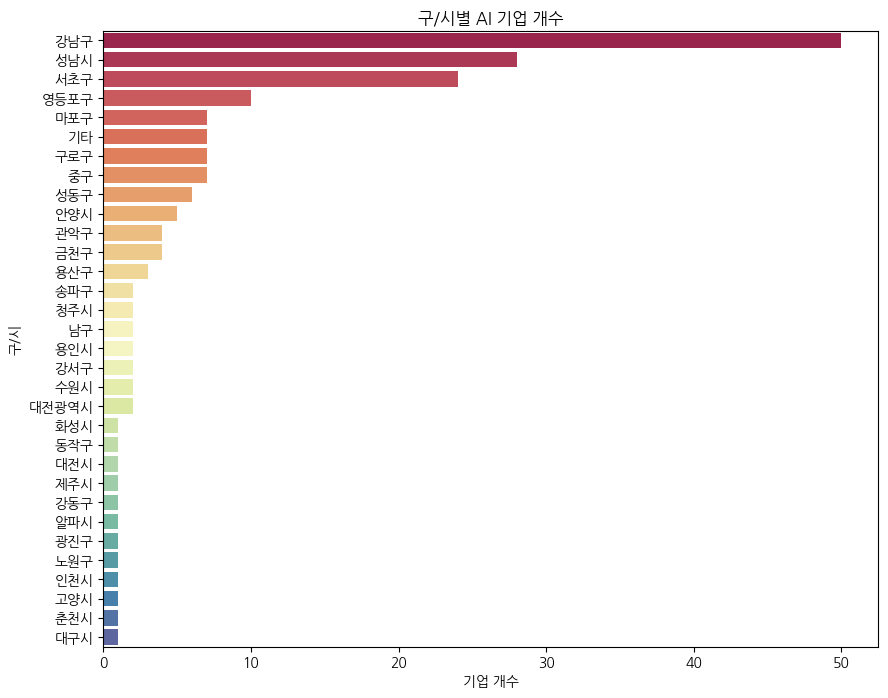

In [5]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

# 데이터 정렬
region_counts_sorted = region_counts.sort_values(ascending=False)

# 막대 그래프 생성
plt.figure(figsize=(10, 8))
sns.barplot(x=region_counts_sorted.values, y=region_counts_sorted.index, palette="Spectral")
plt.title('구/시별 AI 기업 개수')
plt.xlabel('기업 개수')
plt.ylabel('구/시')
plt.show()

/tmp/ipykernel_15209/2653260764.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


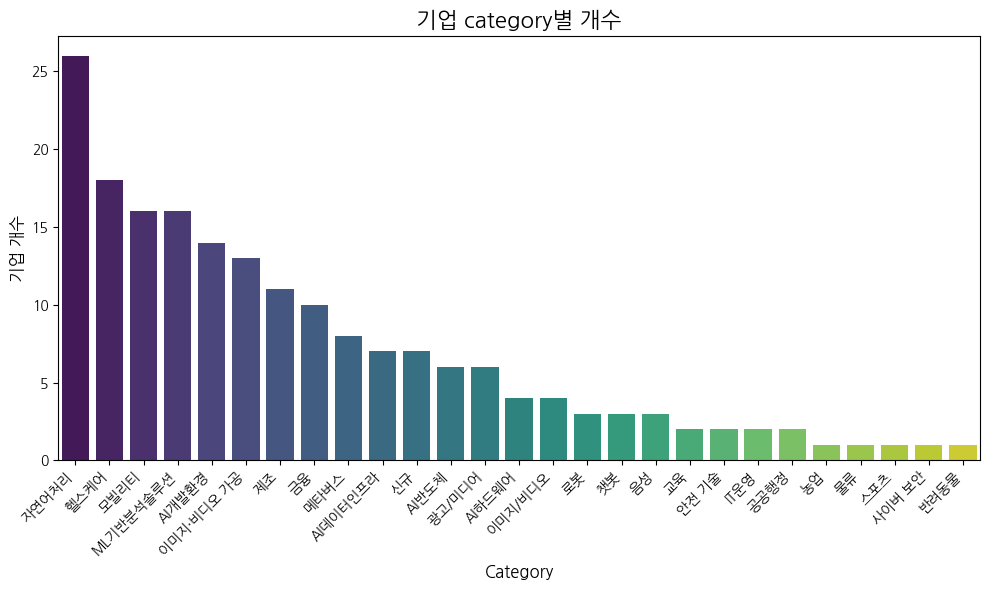

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# category별 기업 개수 계산
category_counts = ai_company_df['category'].value_counts()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')

# 그래프 제목과 축 레이블 설정
plt.title('기업 category별 개수', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('기업 개수', fontsize=12)

# x축 라벨 회전 (필요한 경우)
plt.xticks(rotation=45, ha='right')

# 그래프 표시
plt.tight_layout()
plt.show()

/tmp/ipykernel_15209/1613324647.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


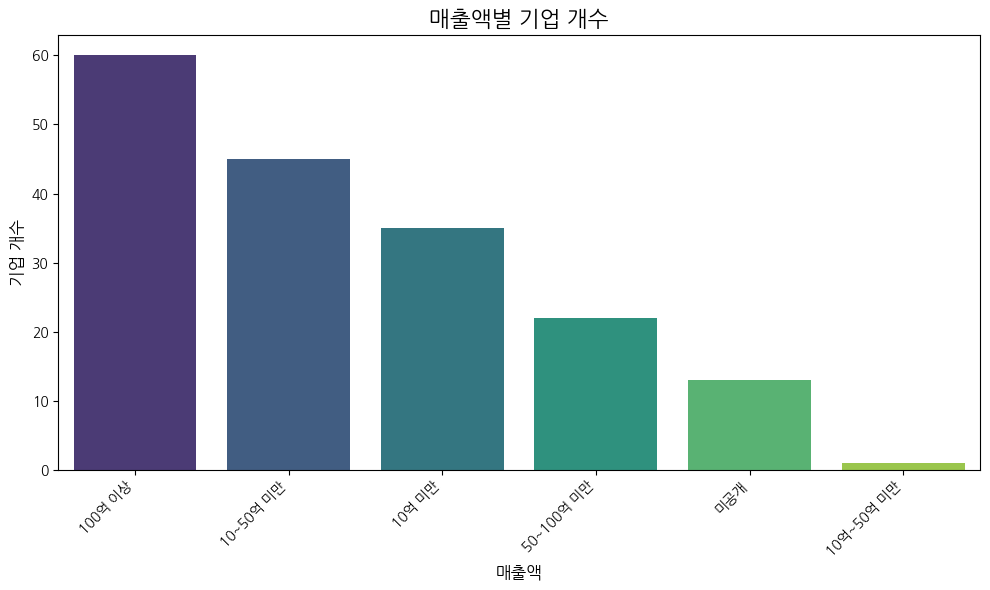

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# category별 기업 개수 계산
category_counts = ai_company_df['revenue'].value_counts()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')

# 그래프 제목과 축 레이블 설정
plt.title('매출액별 기업 개수', fontsize=16)
plt.xlabel('매출액', fontsize=12)
plt.ylabel('기업 개수', fontsize=12)

# x축 라벨 회전 (필요한 경우)
plt.xticks(rotation=45, ha='right')

# 그래프 표시
plt.tight_layout()
plt.show()

/tmp/ipykernel_15209/2073207718.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


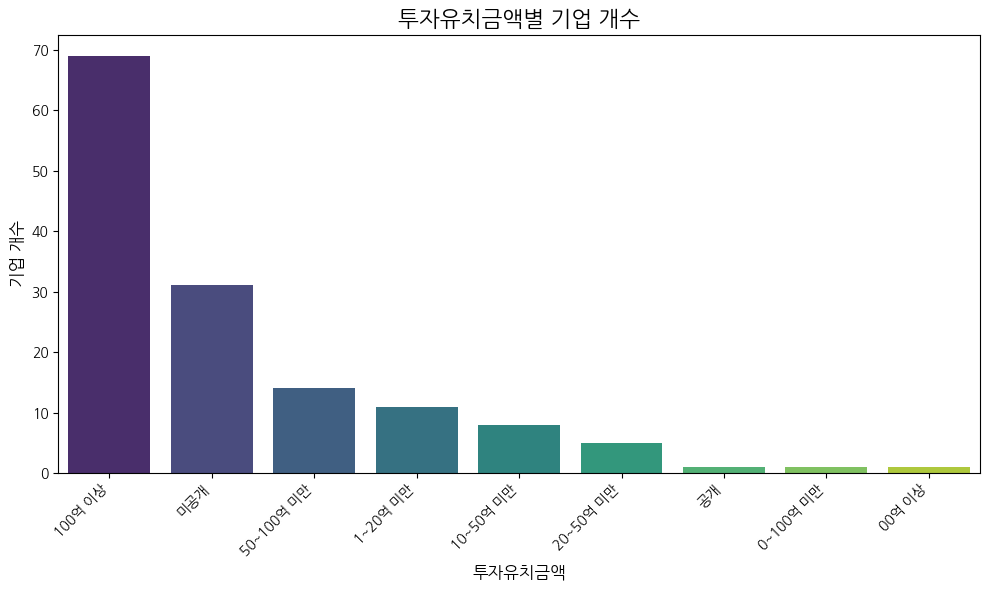

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# category별 기업 개수 계산
category_counts = ai_company_df['investment'].value_counts()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')

# 그래프 제목과 축 레이블 설정
plt.title('투자유치금액별 기업 개수', fontsize=16)
plt.xlabel('투자유치금액', fontsize=12)
plt.ylabel('기업 개수', fontsize=12)

# x축 라벨 회전 (필요한 경우)
plt.xticks(rotation=45, ha='right')

# 그래프 표시
plt.tight_layout()
plt.show()

/tmp/ipykernel_15209/375089341.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


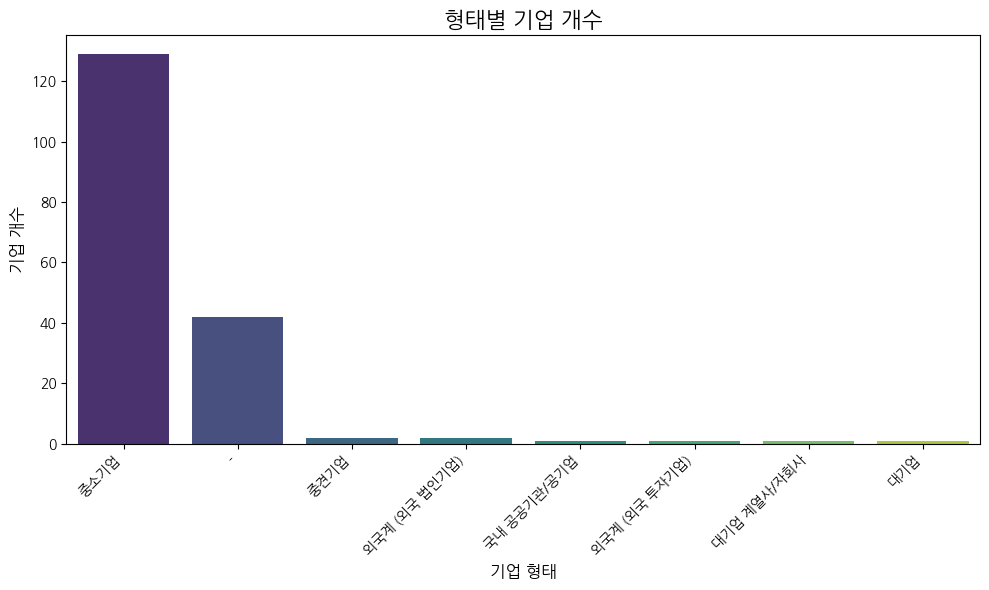

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# category별 기업 개수 계산
category_counts = ai_company_df['company_type'].value_counts()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')

# 그래프 제목과 축 레이블 설정
plt.title('형태별 기업 개수', fontsize=16)
plt.xlabel('기업 형태', fontsize=12)
plt.ylabel('기업 개수', fontsize=12)

# x축 라벨 회전 (필요한 경우)
plt.xticks(rotation=45, ha='right')

# 그래프 표시
plt.tight_layout()
plt.show()

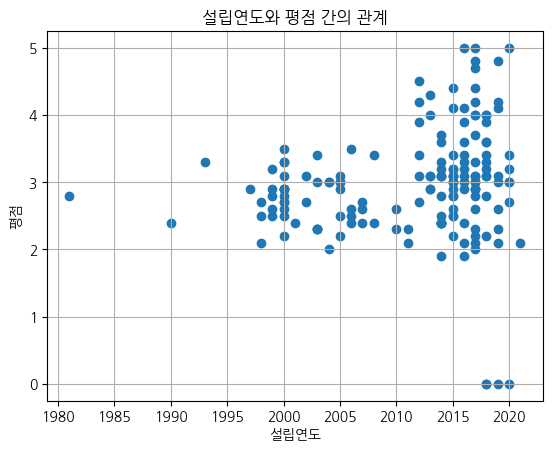

설립연도와 평점 간의 상관계수: 0.14183350504997747


In [10]:
import pandas as pd
import matplotlib.pyplot as plt


# 설립일을 datetime 형식으로 변환하고 연도로 변환
ai_company_df['established_date'] = pd.to_datetime(ai_company_df['established_date'])
ai_company_df['설립연도'] = ai_company_df['established_date'].dt.year

# 평점과 설립연도 간의 산점도
plt.scatter(ai_company_df['설립연도'], ai_company_df['overall_rating'])
plt.title('설립연도와 평점 간의 관계')
plt.xlabel('설립연도')
plt.ylabel('평점')
plt.grid()
plt.show()

# 상관계수 계산
correlation = ai_company_df['설립연도'].corr(ai_company_df['overall_rating'])
print(f'설립연도와 평점 간의 상관계수: {correlation}')

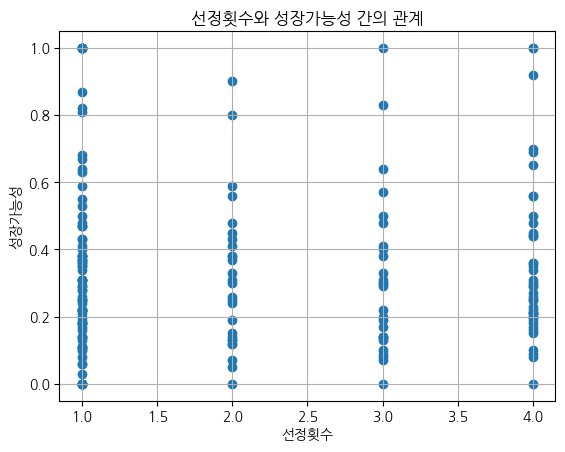

선정횟수 성장가능성 간의 상관계수: -0.006851663987116771


In [11]:
plt.scatter(ai_company_df['선정횟수'], ai_company_df['growth_potential'])
plt.title('선정횟수와 성장가능성 간의 관계')
plt.xlabel('선정횟수')
plt.ylabel('성장가능성')
plt.grid()
plt.show()

# 상관계수 계산
correlation = ai_company_df['선정횟수'].corr(ai_company_df['growth_potential'])
print(f'선정횟수 성장가능성 간의 상관계수: {correlation}')

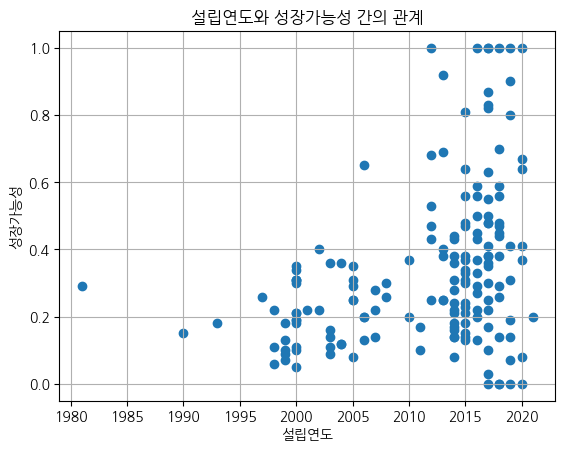

설립연도와 성장가능성 간의 상관계수: 0.35318598096056314


In [12]:
plt.scatter(ai_company_df['설립연도'], ai_company_df['growth_potential'])
plt.title('설립연도와 성장가능성 간의 관계')
plt.xlabel('설립연도')
plt.ylabel('성장가능성')
plt.grid()
plt.show()

# 상관계수 계산
correlation = ai_company_df['설립연도'].corr(ai_company_df['growth_potential'])
print(f'설립연도와 성장가능성 간의 상관계수: {correlation}')

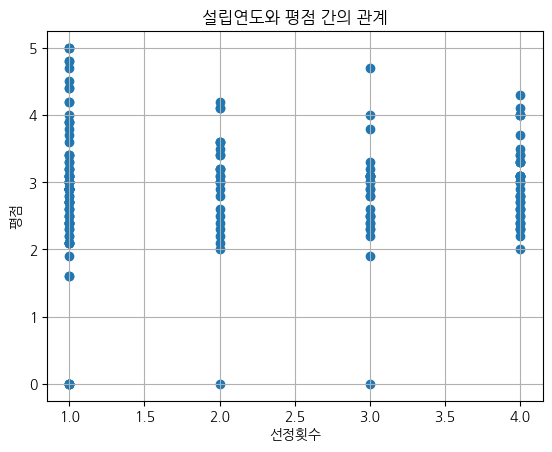

선정횟수와 평점 간의 상관계수: 0.03534555891201827


In [13]:
plt.scatter(ai_company_df['선정횟수'], ai_company_df['overall_rating'])
plt.title('설립연도와 평점 간의 관계')
plt.xlabel('선정횟수')
plt.ylabel('평점')
plt.grid()
plt.show()

# 상관계수 계산
correlation = ai_company_df['선정횟수'].corr(ai_company_df['overall_rating'])
print(f'선정횟수와 평점 간의 상관계수: {correlation}')

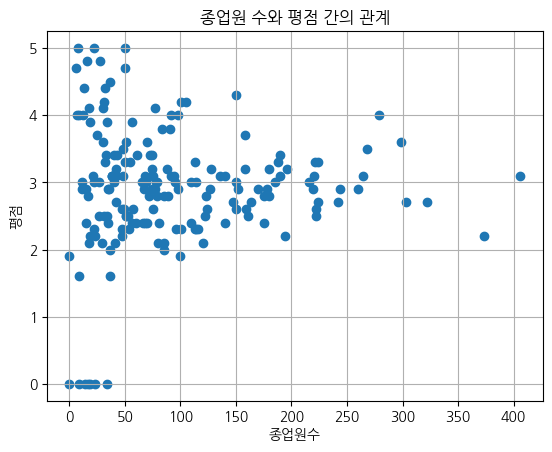

종업원수와 평점 간의 상관계수: 0.03901956929197614


In [14]:
plt.scatter(ai_company_df['employee_count'], ai_company_df['overall_rating'])
plt.title('종업원 수와 평점 간의 관계')
plt.xlabel('종업원수')
plt.ylabel('평점')
plt.grid()
plt.show()

# 상관계수 계산
correlation = ai_company_df['employee_count'].corr(ai_company_df['overall_rating'])
print(f'종업원수와 평점 간의 상관계수: {correlation}')

/tmp/ipykernel_15209/1293812739.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_labels, y=rating_distribution, palette='viridis')


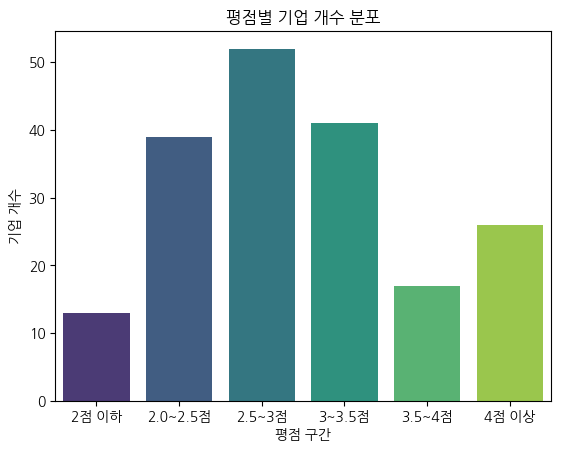

In [15]:
import matplotlib.pyplot as plt

# 평점 구간과 레이블 설정
rating_bins = [2.0, 2.5, 3.0, 3.5, 4.0, 5.0]
rating_labels = ['2점 이하', '2.0~2.5점', '2.5~3점', '3~3.5점', '3.5~4점', '4점 이상']

# 각 기업의 평점을 기준으로 구간 분류
rating_distribution = [0] * len(rating_labels)

# iterrows로 데이터프레임을 순회하며 overall_rating 값을 기준으로 분류
for index, company in ai_company_df.iterrows():
    if company['overall_rating'] <= 2.0:
        rating_distribution[0] += 1
    elif 2.0 < company['overall_rating'] <= 2.5:
        rating_distribution[1] += 1
    elif 2.5 < company['overall_rating'] <= 3.0:
        rating_distribution[2] += 1
    elif 3.0 < company['overall_rating'] <= 3.5:
        rating_distribution[3] += 1
    elif 3.5 < company['overall_rating'] <= 4.0:
        rating_distribution[4] += 1
    else:
        rating_distribution[5] += 1

# 막대그래프 시각화
sns.barplot(x=rating_labels, y=rating_distribution, palette='viridis')
plt.xlabel('평점 구간')
plt.ylabel('기업 개수')
plt.title('평점별 기업 개수 분포')
plt.show()

In [16]:
import folium
import ipywidgets as widgets
from IPython.display import display

# 아이콘 파일 경로 설정
agri_icon = '/home/hyun/dev_ws/SQL/data/agriculture.png'
chatbot_icon = '/home/hyun/dev_ws/SQL/data/chatbot.png'
data_icon = '/home/hyun/dev_ws/SQL/data/data.png'
dev_icon = '/home/hyun/dev_ws/SQL/data/development.png'
edu_icon = '/home/hyun/dev_ws/SQL/data/education.png'
finance_icon = '/home/hyun/dev_ws/SQL/data/finance.png'
hardware_icon = '/home/hyun/dev_ws/SQL/data/hardware.png'
healthcare_icon = '/home/hyun/dev_ws/SQL/data/healthcare.png'
image_icon = '/home/hyun/dev_ws/SQL/data/image.png'
it_icon = '/home/hyun/dev_ws/SQL/data/IT.png'
logistics_icon = '/home/hyun/dev_ws/SQL/data/logistics.png'
ml_icon = '/home/hyun/dev_ws/SQL/data/machine.png'
manufacturing_icon = '/home/hyun/dev_ws/SQL/data/manufacturing.png'
media_icon = '/home/hyun/dev_ws/SQL/data/media.png'
metaverse_icon = '/home/hyun/dev_ws/SQL/data/metaverse.png'
mobility_icon = '/home/hyun/dev_ws/SQL/data/mobility.png'
nlp_icon = '/home/hyun/dev_ws/SQL/data/nlp.png'
pet_icon = '/home/hyun/dev_ws/SQL/data/pet.png'
public_icon = '/home/hyun/dev_ws/SQL/data/public.png'
robot_icon = '/home/hyun/dev_ws/SQL/data/robot.png'
security_icon = '/home/hyun/dev_ws/SQL/data/security.png'
semi_icon = '/home/hyun/dev_ws/SQL/data/semiconductor.png'
sport_icon = '/home/hyun/dev_ws/SQL/data/sports.png'
voice_icon = '/home/hyun/dev_ws/SQL/data/voice.png'

# 카테고리와 아이콘 매핑
icon_mapping = {
    '광고/미디어': media_icon,
    '농업': agri_icon,
    '교육': edu_icon,
    '금융': finance_icon,
    '헬스케어': healthcare_icon,
    '제조': manufacturing_icon,
    '메타버스': metaverse_icon,
    '모빌리티': mobility_icon,
    '로봇': robot_icon,
    '스포츠': sport_icon,
    '물류': logistics_icon,
    '반려동물': pet_icon,
    '공공행정': public_icon,
    'AI데이터인프라': data_icon,
    'AI개발환경': dev_icon,
    'AI반도체': semi_icon,
    '사이버 보안': security_icon,
    '이미지·비디오 가공': image_icon,
    'ML기반분석솔루션': ml_icon,
    '자연어처리': nlp_icon,
    '안전 기술': security_icon,
    '이미지/비디오': image_icon,
    '음성': voice_icon,
    '챗봇': chatbot_icon,
    'IT운영': it_icon,
    'AI하드웨어': hardware_icon
}

all_categories = ['전체 선택'] + list(icon_mapping.keys())

# 카테고리 선택 위젯 생성
category_selector = widgets.SelectMultiple(
    options=all_categories,
    value=['전체 선택'],  # 기본 선택 카테고리
    description='카테고리:',
    disabled=False
)


distinct_cities = ['전체'] + sorted(ai_company_df['구/시'].unique().tolist())  # '시/구' 컬럼의 고유 값 가져오기
city_selector = widgets.SelectMultiple(
    options=distinct_cities,
    value=['전체'],  # 기본 선택
    description='시/구:',
    disabled=False
)


# 종업원 수 필터링 선택 위젯 생성
employee_count_filter = widgets.SelectMultiple(
    options=[
        '전체',
        '10명 이하',
        '10~50명',
        '50~100명',
        '100명 이상',
        '200명 이상',
        '300명 이상'
    ],
    value=['전체'],  # 기본 선택
    description='종업원 수:',
    disabled=False
)

# 매출액 필터링 선택 위젯 생성
revenue_filter = widgets.SelectMultiple(
    options=[
        '전체',
        '10억 미만 / 미공개',
        '10~50억 미만',
        '50~100억 미만',
        '100억 이상',
    ],
    value=['전체'],  # 기본 선택
    description='매출액:',
    disabled=False
)

rating_filter = widgets.SelectMultiple(
    options=[
        '전체',
        '2 이하',
        '2~2.5',
        '2.5~3',
        '3~3.5',
        '3.5~4',
        '4 이상'
    ],
    value=['전체'],  # 기본 선택
    description='평점:',
    disabled=False
)

search_box = widgets.Text(
    value='',
    placeholder='기업 이름 검색...',
    description='검색:',
    disabled=False
)

# 필터 박스에 검색 박스 추가
filters_box = widgets.HBox([category_selector, city_selector, employee_count_filter, revenue_filter, rating_filter, search_box])


def update_filtered_df(search_term):
    if search_term:
        # 검색어를 포함하는 기업명으로 필터링
        return ai_company_df[ai_company_df['company_name'].str.contains(search_term, case=False, na=False)]
    return ai_company_df  # 검색어가 없으면 전체 데이터프레임 반환



def update_map(selected_categories, selected_cities, selected_employee_counts, selected_revenue_counts, selected_ratings, filtered_df):
    mapping = folium.Map(location=[37.5665, 126.9780], zoom_start=9)


    # "전체 선택"이 선택되면 모든 카테고리를 선택
    if '전체 선택' in selected_categories:
        selected_categories = list(icon_mapping.keys())
    
    # "전체" 시/구 선택 시 모든 시/구 포함
    if '전체' in selected_cities:
        selected_cities = ai_company_df['구/시'].unique().tolist()

    for idx, row in filtered_df.iterrows():
        category = row['category']
        city = row['구/시']  # 시/구 필터링 적용
        employee_count = row['employee_count']
        revenue = row['revenue']
        rating = row['overall_rating']  # 평점 데이터 추가

        if city not in selected_cities and '전체' not in selected_cities:
            continue

        # 카테고리, 시/구, 종업원 수, 매출액, 평점 필터링 적용
        if category in selected_categories and category in icon_mapping:
            # 종업원 수 필터링 적용
            if '전체' not in selected_employee_counts:
                if '10명 이하' in selected_employee_counts and employee_count > 10:
                    continue
                if '10~50명' in selected_employee_counts and not (10 <= employee_count < 50):
                    continue
                if '50~100명' in selected_employee_counts and not (50 <= employee_count <= 100):
                    continue
                if '100명 이상' in selected_employee_counts and employee_count < 100:
                    continue
                if '200명 이상' in selected_employee_counts and employee_count < 200:
                    continue
                if '300명 이상' in selected_employee_counts and employee_count < 300:
                    continue
            
            # 매출액 필터링 적용
            if '전체' not in selected_revenue_counts:
                # 매출 범위에 따라 체크
                revenue_matched = False
                if '10억 미만 / 미공개' in selected_revenue_counts:
                    if revenue is None or revenue == '미공개' or revenue == '10억 미만':
                        revenue_matched = True
                if '10~50억 미만' in selected_revenue_counts and revenue == '10~50억 미만':
                    revenue_matched = True
                if '50~100억 미만' in selected_revenue_counts and revenue == '50~100억 미만':
                    revenue_matched = True
                if '100억 이상' in selected_revenue_counts and revenue == '100억 이상':
                    revenue_matched = True
                
                # 매출 조건을 만족하지 않는 경우
                if not revenue_matched:
                    continue

            if '전체' not in selected_ratings:
                rating_matched = False
                if '2 이하' in selected_ratings and rating <= 2:
                    rating_matched = True
                if '2~2.5' in selected_ratings and 2 < rating < 2.5:
                    rating_matched = True
                if '2.5~3' in selected_ratings and 2.5 <= rating < 3:
                    rating_matched = True
                if '3~3.5' in selected_ratings and 3 <= rating < 3.5:
                    rating_matched = True
                if '3.5~4' in selected_ratings and 3.5 <= rating < 4:
                    rating_matched = True
                if '4 이상' in selected_ratings and rating >= 4:
                    rating_matched = True

                if not rating_matched:
                    continue
            
            # 조건을 만족하는 경우에만 마커 추가
            custom_icon = folium.CustomIcon(icon_mapping[category], icon_size=(30, 30))
            folium.Marker(
                location=[row["위도"], row["경도"]],
                popup=folium.Popup(f"""
                    <strong>{row['company_name']}</strong><br>
                    산업 타입: {row['industry_type']}<br>                 
                    카테고리: {row['category']}<br>
                    기업 형태: {row['company_type']}<br>
                    종업원 수: {row['employee_count']}<br>
                    평점: {row['overall_rating']}<br>
                    복지 및 급여: {row['welfare_Salary']}<br>
                    업무와 삶의 균형: {row['work_life_balance']}<br>
                    사내문화: {row['company_culture']}<br>
                    기업 추천율: {row['recommendation']}<br>                                                            
                    성장 가능성: {row['growth_potential']}<br>
                    투자 유치 금액: {row['investment']}<br>
                    최근 투자 유치 연도: {row['recent_funding_year']}<br>
                    현재 라운드: {row['round']}<br>
                    주소: {row['address']}<br>
                    홈페이지: {row['homepage']}<br>
                    선정 연도: {row['selected_year']}<br>
                    선정 횟수: {row['선정횟수']}<br>
                    인재상: {row['ideal_talent']}<br>
                """, max_width=500, min_width=300, parse_html=False),
                icon=custom_icon
            ).add_to(mapping)
    
    return mapping

# 인터랙티브 위젯을 통해 필터 선택 시 지도 업데이트
out = widgets.Output()

def on_change(change):
    with out:
        out.clear_output(wait=True)  # 기존 지도를 완전히 제거하고 새로운 지도를 추가
        search_term = search_box.value  # 검색어 가져오기
        filtered_df = update_filtered_df(search_term)  # 검색어로 필터링된 데이터프레임
        
        # 필터링된 데이터프레임이 비어있는지 확인
        if filtered_df.empty:
            print("검색 결과가 없습니다.")
            return  # 검색 결과가 없으면 더 이상 진행하지 않음

        selected_categories = category_selector.value
        selected_cities = city_selector.value  # 시/구 필터 적용
        selected_employee_counts = employee_count_filter.value
        selected_revenue_counts = revenue_filter.value
        selected_ratings = rating_filter.value
        updated_map = update_map(selected_categories, selected_cities, selected_employee_counts, selected_revenue_counts, selected_ratings, filtered_df)
        display(updated_map)
# 위젯 값이 변경될 때 호출되는 이벤트 등록
category_selector.observe(on_change, names='value')
city_selector.observe(on_change, names='value')  # 시/구 필터 추가
employee_count_filter.observe(on_change, names='value')
revenue_filter.observe(on_change, names='value')
rating_filter.observe(on_change, names='value')
search_box.observe(on_change, names='value')

# UI 표시 
display(filters_box)  # 가로로 나열된 필터 표시 
display(out)
# 기본적으로 첫 번째 선택된 카테고리로 지도 표시
with out:
    display(update_map(
        category_selector.value,
        city_selector.value,  # 추가된 시/구 필터
        employee_count_filter.value,
        revenue_filter.value,
        rating_filter.value,
        ai_company_df  # 추가된 평점 필터
    ))

Output()